# 2021 KOSAIM Hands-On

![alt text](https://adeshpande3.github.io/assets/Cover.png)

# -1. Colab GPU setting... 

Menu -> Runtime -> Change runtime type 

![gpu setting](https://raw.githubusercontent.com/mi2rl/datasets/master/gpu.png)


In [2]:
#check GPU is well mounted
!nvidia-smi

Thu May 13 06:55:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!rm -rf *

# 0. Folder mounting

In [3]:
!pwd

/content


In [4]:
!ls

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [6]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz

--2021-05-13 06:55:53--  https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62087736 (59M) [application/octet-stream]
Saving to: ‘mednist.tar.gz’

mednist.tar.gz      100%[===================>]  59.21M   210MB/s    in 0.3s    

2021-05-13 06:55:54 (210 MB/s) - ‘mednist.tar.gz’ saved [62087736/62087736]



# [1] 데이터 준비: MedNIST dataset


## 1.1. 데이터 다운로드

In [6]:
!pwd # 현재 경로 확인

/content


In [7]:
!ls # 현재 경로 내용 확인

mednist.tar.gz


In [7]:
# 데이터 다운로드
!wget https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz

--2021-05-13 06:55:58--  https://raw.githubusercontent.com/mi2rl/datasets/master/mednist.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62087736 (59M) [application/octet-stream]
Saving to: ‘mednist.tar.gz.1’

mednist.tar.gz.1    100%[===================>]  59.21M   232MB/s    in 0.3s    

2021-05-13 06:55:59 (232 MB/s) - ‘mednist.tar.gz.1’ saved [62087736/62087736]



In [9]:
!ls

mednist.tar.gz	mednist.tar.gz.1


In [8]:
# 압축 풀기
!tar xzf mednist.tar.gz

In [11]:
!ls

mednist.tar.gz	mednist.tar.gz.1  resized


## 1.2. 데이터 파악


/resized
1. /AbdomenCT
2. /BreastMRI
3. /CXR
4. /ChestCT
5. /Hand
6. /HeadCT


In [9]:
# 패키지 불러오기
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
dataDir = 'resized' # 데이터 위치
classNames = os.listdir(dataDir) # 각 클래스의 이름들
numClass = len(classNames)               # 클래스 개수

print('Class names: ', classNames)
print('number of classes', numClass)

for tmp in range(len(classNames)):
  NImage=len(os.listdir(os.path.join(dataDir, classNames[tmp])))
  print('Class ', classNames[tmp], 'has ', NImage, ' of images.')
  

Class names:  ['BreastMRI', 'CXR', 'HeadCT', 'ChestCT', 'AbdomenCT', 'Hand']
number of classes 6
Class  BreastMRI has  8954  of images.
Class  CXR has  10000  of images.
Class  HeadCT has  10000  of images.
Class  ChestCT has  10000  of images.
Class  AbdomenCT has  10000  of images.
Class  Hand has  10000  of images.


Breast MRI data description
num of images 8954
sample image size (64, 64)
sample filename 004834.jpeg


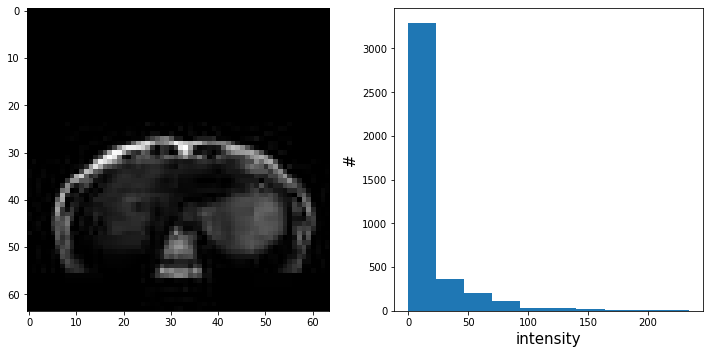

In [14]:
#Breast MRI
breastMRI_list=os.listdir(os.path.join(dataDir, 'BreastMRI'))
sampleImage=cv2.imread(os.path.join(dataDir, 'BreastMRI', breastMRI_list[0]), 0)

print('Breast MRI data description')
print('num of images', len(breastMRI_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', breastMRI_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

CXR data description
num of images 10000
sample image size (64, 64)
sample filename 004834.jpeg


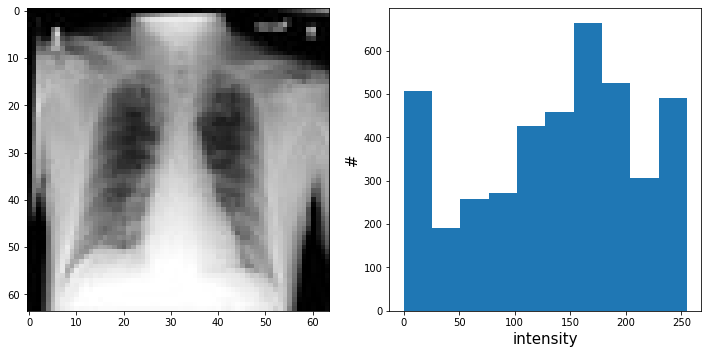

In [15]:
#CXR
CXR_list=os.listdir(os.path.join(dataDir, 'CXR'))
sampleImage=cv2.imread(os.path.join(dataDir, 'CXR', CXR_list[0]), 0)

print('CXR data description')
print('num of images', len(CXR_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', CXR_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

HeadCT data description
num of images 10000
sample image size (64, 64)
sample filename 004834.jpeg


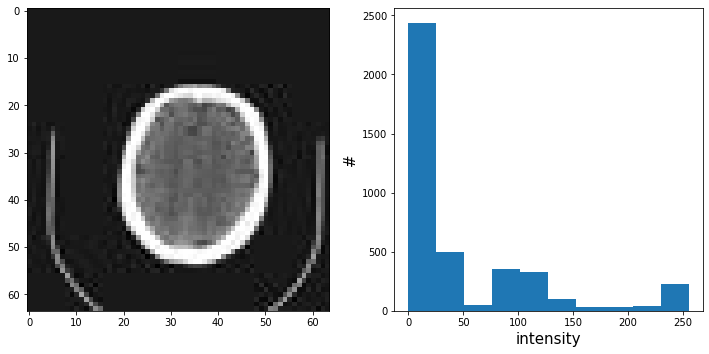

In [16]:
#HeadCT
HeadCT_list=os.listdir(os.path.join(dataDir, 'HeadCT'))
sampleImage=cv2.imread(os.path.join(dataDir, 'HeadCT', HeadCT_list[0]), 0)

print('HeadCT data description')
print('num of images', len(HeadCT_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', HeadCT_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

ChestCT data description
sample image size (64, 64)
sample filename 004834.jpeg


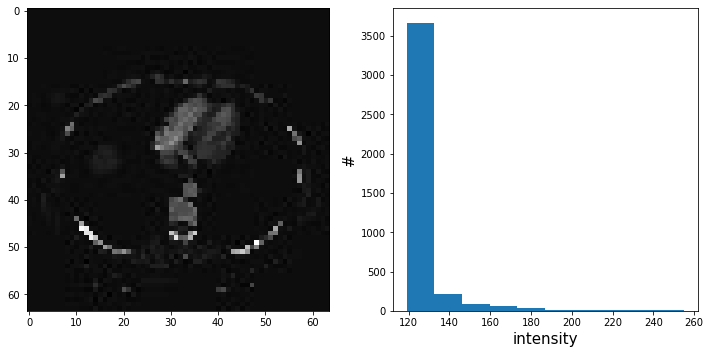

In [17]:
#ChestCT
ChestCT_list=os.listdir(os.path.join(dataDir, 'ChestCT'))
sampleImage=cv2.imread(os.path.join(dataDir, 'ChestCT', ChestCT_list[0]), 0)

print('ChestCT data description')
print('sample image size', np.shape(sampleImage))
print('sample filename', ChestCT_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

AbdomenCT data description
num of images 10000
sample image size (64, 64)
sample filename 004834.jpeg


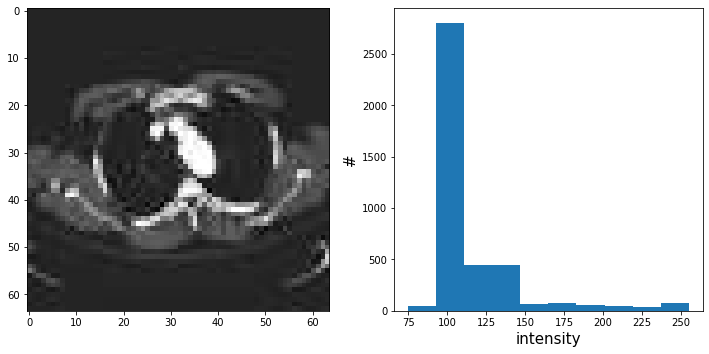

In [18]:
#AbdomenCT
AbdomenCT_list=os.listdir(os.path.join(dataDir, 'AbdomenCT'))
sampleImage=cv2.imread(os.path.join(dataDir, 'AbdomenCT', AbdomenCT_list[0]), 0)

print('AbdomenCT data description')
print('num of images', len(AbdomenCT_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', AbdomenCT_list[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

Hand data description
num of images 10000
sample image size (64, 64)
sample filename 004834.jpeg


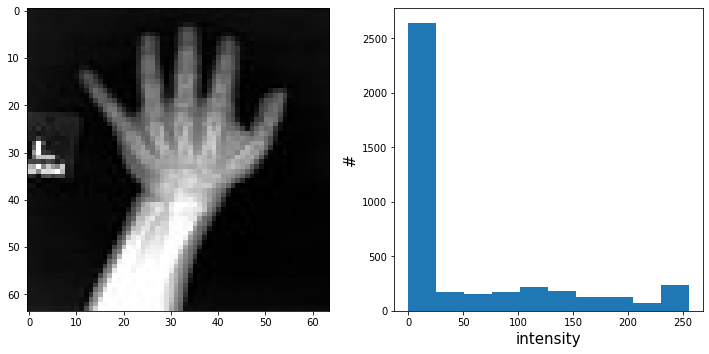

In [19]:
#Hand
Hand_list=os.listdir(os.path.join(dataDir, 'Hand'))
sampleImage=cv2.imread(os.path.join(dataDir, 'Hand', Hand_list[0]), 0)

print('Hand data description')
print('num of images', len(Hand_list))
print('sample image size', np.shape(sampleImage))
print('sample filename', Hand_list[0])
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(sampleImage, cmap='gray')
plt.subplot(122)
plt.hist(sampleImage.flatten())
plt.xlabel('intensity', fontsize=15)
plt.ylabel('#', fontsize=15)
plt.tight_layout()
plt.show()

# [2] VGG16를 이용한 분류 실습



![VGG16 네트워크 구조](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

In [13]:
# import keras,os
# 
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

# 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Model

## 2.1. [Quiz] 순서가 섞인 layer들을 VGG16 구성에 맞게 배치해보세요.

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [16]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [17]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [18]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [19]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [20]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

## 2.2. VGG 모델 불러오기

In [22]:
from keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

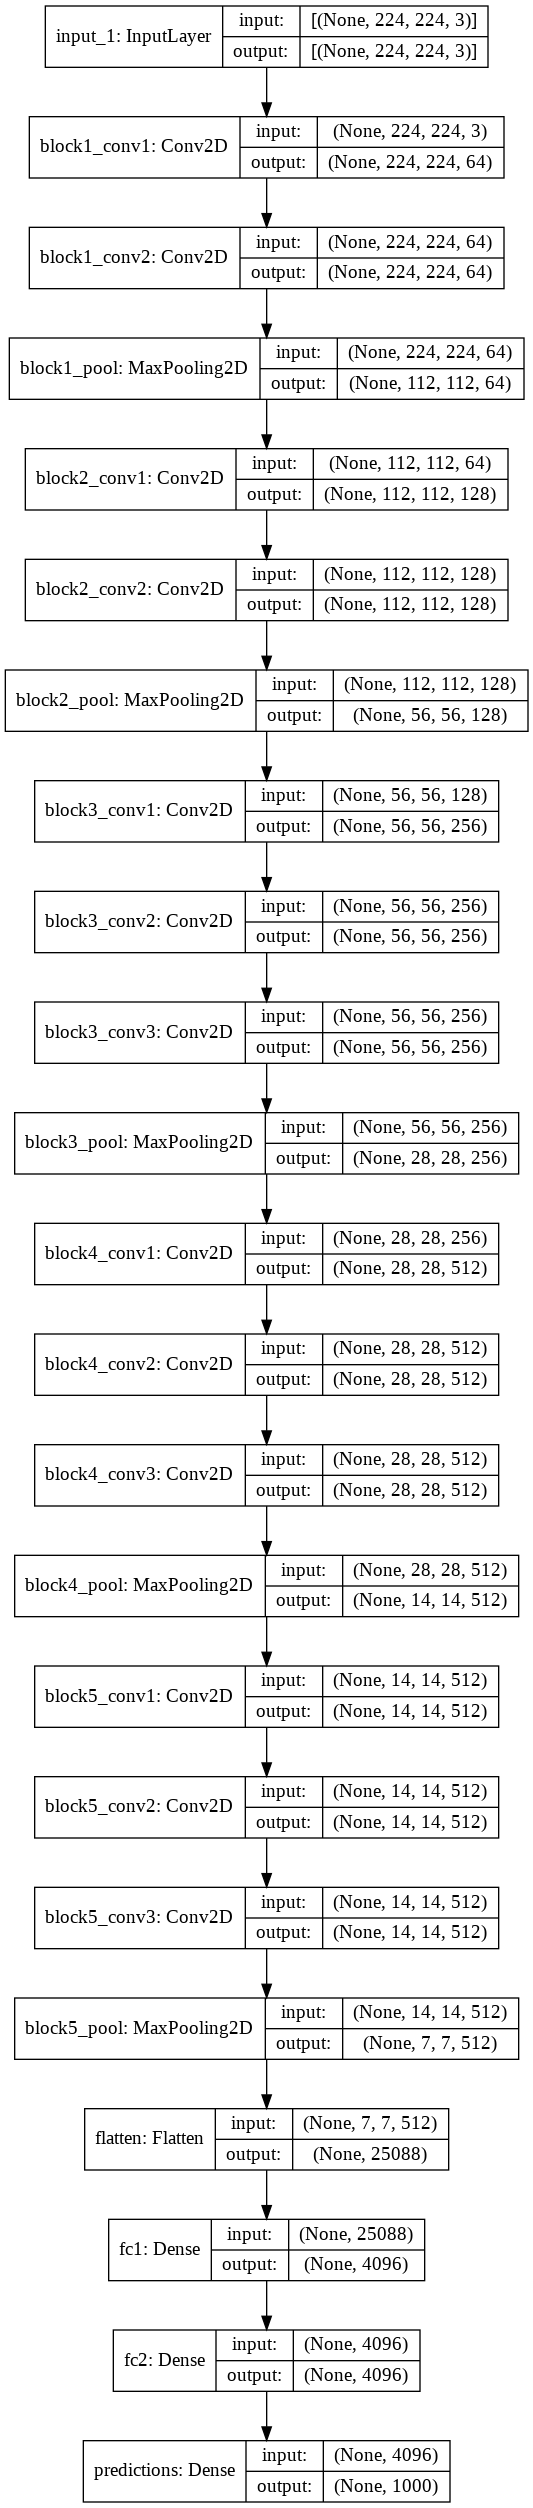

In [23]:
# Model 구성도 plot
keras.utils.plot_model(model, to_file='vgg16.png', show_shapes=True, show_layer_names=True)

## 2.3. keras 에서 제공되는 모델들 참고: https://keras.io/applications/

## 2.5. VGG 모델로 MedNIST dataset 학습하기

### 2.5.1. Dataset 나누기
* Train / Validation / Test

In [25]:
import shutil
try:
  shutil.rmtree('dataset/study1')
except:
  pass

In [26]:
print(classNames)

['BreastMRI', 'CXR', 'HeadCT', 'ChestCT', 'AbdomenCT', 'Hand']


In [27]:
import tqdm
import random

trainFrac = 0.7
tuneFrac = 0.1   # Define the fraction of images to move to validation dataset
validFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/study1/train', classNames[tmp]))
  os.makedirs(os.path.join('dataset/study1/tune', classNames[tmp]))
  os.makedirs(os.path.join('dataset/study1/valid', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  tune_N=int(len(filelist_tmp)*tuneFrac)
  valid_N=len(filelist_tmp)-train_N-tune_N

  trainList_tmp=filelist_tmp[:train_N]
  tuneList_tmp=filelist_tmp[train_N:train_N+tune_N]
  validList_tmp=filelist_tmp[train_N+tune_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/study1/train', classNames[tmp]))

  for tmp2 in range(len(tuneList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], tuneList_tmp[tmp2]), os.path.join('dataset/study1/tune', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/study1/valid', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of tune set: ', len(tuneList_tmp))
  print('num of valid set: ', len(validList_tmp))

 17%|█▋        | 1/6 [00:00<00:03,  1.43it/s]


Class:  BreastMRI
num of train set:  6267
num of tune set:  895
num of valid set:  1792


 33%|███▎      | 2/6 [00:01<00:02,  1.37it/s]


Class:  CXR
num of train set:  7000
num of tune set:  1000
num of valid set:  2000


 50%|█████     | 3/6 [00:02<00:02,  1.22it/s]


Class:  HeadCT
num of train set:  7000
num of tune set:  1000
num of valid set:  2000


 67%|██████▋   | 4/6 [00:03<00:01,  1.19it/s]


Class:  ChestCT
num of train set:  7000
num of tune set:  1000
num of valid set:  2000


 83%|████████▎ | 5/6 [00:04<00:00,  1.18it/s]


Class:  AbdomenCT
num of train set:  7000
num of tune set:  1000
num of valid set:  2000


100%|██████████| 6/6 [00:05<00:00,  1.13it/s]


Class:  Hand
num of train set:  7000
num of tune set:  1000
num of valid set:  2000


### 2.5.2. Image Data Generator 정의

**Keras API - ImageDataGenerator: 일정한 규칙으로 만들어진 폴더구조에서 데이터셋을 자동으로 불러와 학습에 사용할 수 있게 도와주는 API**

![alt text](https://miro.medium.com/max/875/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg)
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [28]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/study1/train'
tune_dir = './dataset/study1/tune'
valid_dir = './dataset/study1/valid'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
 
# 검증에 사용될 이미지 데이터 생성기
tune_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
tune_generator = tune_datagen.flow_from_directory(
        tune_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 41267 images belonging to 6 classes.
Found 5895 images belonging to 6 classes.
Found 11792 images belonging to 6 classes.


### 2.5.3. VGG 모델을 MedNIST dataset에 맞게 재구성하기

In [29]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [30]:
# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [31]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [32]:
# 새로운 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
!pip install livelossplot

In [34]:
from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

### 2.5.4. 학습!

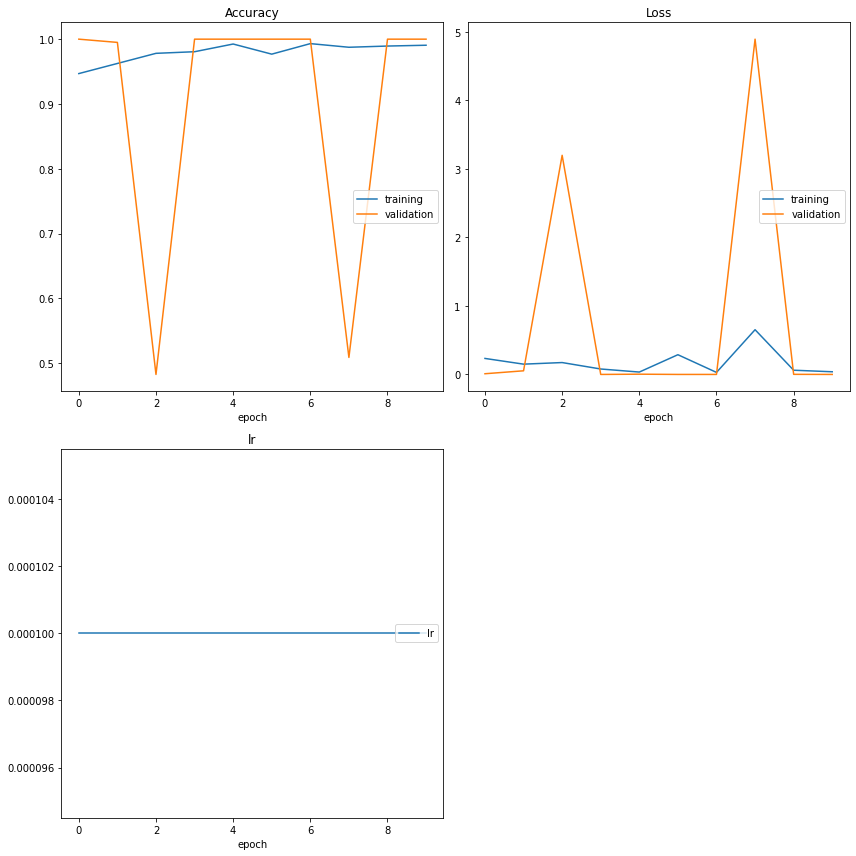

Accuracy
	training         	 (min:    0.947, max:    0.993, cur:    0.991)
	validation       	 (min:    0.482, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.030, max:    0.653, cur:    0.039)
	validation       	 (min:    0.000, max:    4.893, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


In [44]:
import keras

datapath='./output'
FOLDER = 'study1'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, period=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

vgg16_model_path = 'vgg16_scratch.h5'

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=10,
      callbacks=callbacks_list,
      validation_data=tune_generator,
      validation_steps=25,
      verbose=1)

### 2.5.6. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [45]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

    5/11792 [..............................] - ETA: 2:43 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


11792/11792 [==============================] - 113s 10ms/step


In [47]:
# y_test labeling
y_valid = valid_generator.labels

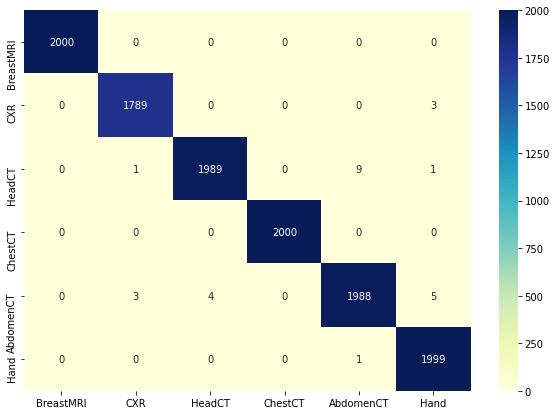

In [48]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [49]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00      2000
         CXR       1.00      1.00      1.00      1792
      HeadCT       1.00      0.99      1.00      2000
     ChestCT       1.00      1.00      1.00      2000
   AbdomenCT       0.99      0.99      0.99      2000
        Hand       1.00      1.00      1.00      2000

    accuracy                           1.00     11792
   macro avg       1.00      1.00      1.00     11792
weighted avg       1.00      1.00      1.00     11792



In [50]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

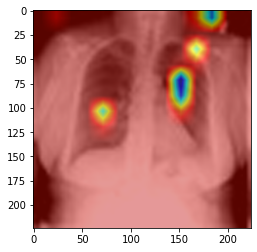

In [82]:
import tensorflow as tf

# Select a random query image+
validList=os.listdir(os.path.join(dataDir, 'CXR'))
inum = np.random.randint(len(validList))
qimage=cv2.imread(os.path.join(dataDir, 'CXR', validList[inum]))
qimage = cv2.resize(qimage, (224, 224), interpolation = cv2.INTER_CUBIC)
# qimage0 = load_img(os.path.join(datavalidList_tmp[inum], target_size=(224, 224))

# qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
# plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()

# Data imbalance problem

In [40]:
print(classNames)

['BreastMRI', 'CXR', 'HeadCT', 'ChestCT', 'AbdomenCT', 'Hand']


In [109]:
classNames_imbalance=['AbdomenCT', 'ChestCT_imbalance']
imbalance_dataset='ChestCT_imbalance'

try:
  shutil.rmtree(os.path.join(dataDir, imbalance_dataset))
except:
  pass


os.makedirs(os.path.join(dataDir, imbalance_dataset))
filelist=os.listdir(os.path.join(dataDir, 'ChestCT'))
random.shuffle(filelist)

imbalanceFrac=0.05
filelist_imbalanceN=int(len(filelist)*imbalanceFrac)
filelist_imbalance=filelist[:filelist_imbalanceN]

for tmp in range(len(filelist_imbalance)):
  shutil.copy(os.path.join(dataDir, imbalance_dataset.split('_')[0], filelist_imbalance[tmp]), os.path.join(dataDir, imbalance_dataset))

In [110]:
imbalanceClass_index=classNames_imbalance.index(imbalance_dataset)

if imbalanceClass_index == 0:
  balanceClass_index = 1
else:
  balanceClass_index = 0

In [111]:
import shutil
try:
  shutil.rmtree('dataset/study2')
except:
  pass

In [112]:
import tqdm
import random

trainFrac = 0.7
tuneFrac = 0.1   # Define the fraction of images to move to validation dataset
validFrac = 0.2    # Define the fraction of images to move to test dataset

filelist_tmp=os.listdir(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index]))
random.shuffle(filelist_tmp)
train_N=int(len(filelist_tmp)*trainFrac)
tune_N=int(len(filelist_tmp)*tuneFrac)
valid_N=len(filelist_tmp)-train_N-tune_N

trainList_tmp=filelist_tmp[:train_N]
tuneList_tmp=filelist_tmp[train_N:train_N+tune_N]
validList_tmp=filelist_tmp[train_N+tune_N:]

os.makedirs(os.path.join('dataset/study2/train', classNames_imbalance[imbalanceClass_index]))
os.makedirs(os.path.join('dataset/study2/tune', classNames_imbalance[imbalanceClass_index]))
os.makedirs(os.path.join('dataset/study2/valid', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(trainList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], trainList_tmp[tmp2]), os.path.join('dataset/study2/train', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(tuneList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], tuneList_tmp[tmp2]), os.path.join('dataset/study2/tune', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(validList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], validList_tmp[tmp2]), os.path.join('dataset/study2/valid', classNames_imbalance[imbalanceClass_index]))


print('')
print('Class: ', classNames_imbalance[imbalanceClass_index])
print('num of train set: ', len(trainList_tmp))
print('num of tune set: ', len(tuneList_tmp))
print('num of valid set: ', len(validList_tmp))




filelist_tmp=os.listdir(os.path.join(dataDir, classNames_imbalance[balanceClass_index]))
random.shuffle(filelist_tmp)

validList_tmp=filelist_tmp[:valid_N]
tuneList_tmp=filelist_tmp[valid_N:valid_N+tune_N]
trainList_tmp=filelist_tmp[valid_N+tune_N:]

os.makedirs(os.path.join('dataset/study2/train', classNames_imbalance[balanceClass_index]))
os.makedirs(os.path.join('dataset/study2/tune', classNames_imbalance[balanceClass_index]))
os.makedirs(os.path.join('dataset/study2/valid', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(trainList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], trainList_tmp[tmp2]), os.path.join('dataset/study2/train', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(tuneList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], tuneList_tmp[tmp2]), os.path.join('dataset/study2/tune', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(validList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], validList_tmp[tmp2]), os.path.join('dataset/study2/valid', classNames_imbalance[balanceClass_index]))


print('')
print('Class: ', classNames_imbalance[balanceClass_index])
print('num of train set: ', len(trainList_tmp))
print('num of tune set: ', len(tuneList_tmp))
print('num of valid set: ', len(validList_tmp))



Class:  ChestCT_imbalance
num of train set:  350
num of tune set:  50
num of valid set:  100

Class:  AbdomenCT
num of train set:  9850
num of tune set:  50
num of valid set:  100


In [113]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/study2/train'
tune_dir = './dataset/study2/tune'
valid_dir = './dataset/study2/valid'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
 
# 검증에 사용될 이미지 데이터 생성기
tune_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True)

# 검증에 사용될 데이터 생성기
tune_generator = tune_datagen.flow_from_directory(
        tune_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

Found 10200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [114]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

In [115]:
# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [116]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
numClass=2

x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [ ]:
model.summary()

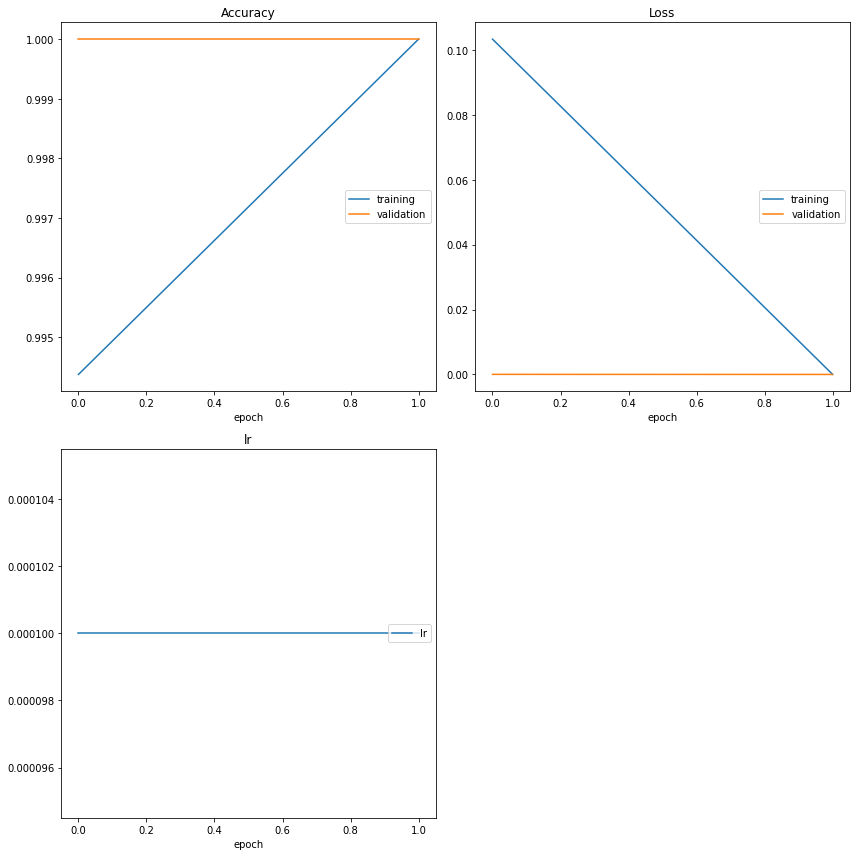

Accuracy
	training         	 (min:    0.994, max:    1.000, cur:    1.000)
	validation       	 (min:    1.000, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.103, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
lr
	lr               	 (min:    0.000, max:    0.000, cur:    0.000)


In [119]:
import keras

from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

datapath='./output'
FOLDER = 'study2'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, period=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

vgg16_model_path = 'vgg16_scratch.h5'

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      callbacks=callbacks_list,
      validation_data=tune_generator,
      validation_steps=25,
      verbose=1)

  5/200 [..............................] - ETA: 2s 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


200/200 [==============================] - 2s 9ms/step


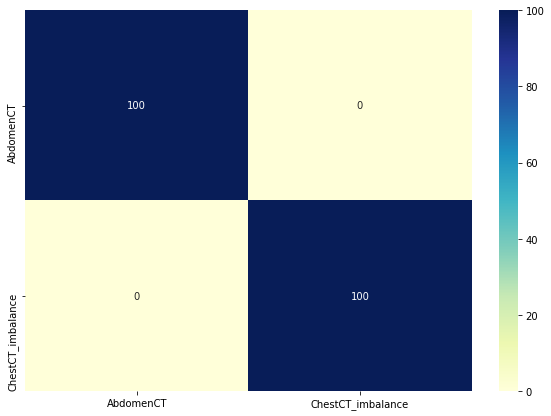

                   precision    recall  f1-score   support

        AbdomenCT       1.00      1.00      1.00       100
ChestCT_imbalance       1.00      1.00      1.00       100

         accuracy                           1.00       200
        macro avg       1.00      1.00      1.00       200
     weighted avg       1.00      1.00      1.00       200



In [120]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report


# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

# y_test labeling
y_valid = valid_generator.labels

# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames_imbalance], columns = [i for i in classNames_imbalance])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames_imbalance))


# ImageNet transfer learning for imbalanced dataset

In [121]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작'

# 모델 불러오기
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [122]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
numClass=2

x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

In [ ]:
import keras

from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

datapath='./output'
FOLDER = 'study3'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, period=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      callbacks=callbacks_list,
      validation_data=tune_generator,
      validation_steps=25,
      verbose=1)


In [ ]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report


# For prediction purposes
y_pred = model.predict_generator(valid_generator, steps=valid_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

# y_test labeling
y_valid = valid_generator.labels

# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_valid, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames_imbalance], columns = [i for i in classNames_imbalance])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# classification report generation: precision, recall, f1-score. 
print(classification_report(y_valid, y_pred1, target_names=classNames_imbalance))


# Balancing the dataset and retrain

In [123]:
classNames_imbalance=['AbdomenCT', 'ChestCT_imbalance']
imbalance_dataset='ChestCT_imbalance'

try:
  shutil.rmtree(os.path.join(dataDir, imbalance_dataset))
except:
  pass


os.makedirs(os.path.join(dataDir, imbalance_dataset))
filelist=os.listdir(os.path.join(dataDir, 'ChestCT'))
random.shuffle(filelist)

imbalanceFrac=0.05
filelist_imbalanceN=int(len(filelist)*imbalanceFrac)
filelist_imbalance=filelist[:filelist_imbalanceN]

for tmp in range(len(filelist_imbalance)):
  shutil.copy(os.path.join(dataDir, imbalance_dataset.split('_')[0], filelist_imbalance[tmp]), os.path.join(dataDir, imbalance_dataset))
  

In [124]:
imbalanceClass_index=classNames_imbalance.index(imbalance_dataset)

if imbalanceClass_index == 0:
  balanceClass_index = 1
else:
  balanceClass_index = 0

In [130]:
import shutil
try:
  shutil.rmtree('dataset/study4')
except:
  pass

In [131]:
import tqdm
import random

trainFrac = 0.7
tuneFrac = 0.1   # Define the fraction of images to move to validation dataset
validFrac = 0.2    # Define the fraction of images to move to test dataset

filelist_tmp=os.listdir(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index]))
random.shuffle(filelist_tmp)
train_N=int(len(filelist_tmp)*trainFrac)
tune_N=int(len(filelist_tmp)*tuneFrac)
valid_N=len(filelist_tmp)-train_N-tune_N

trainList_tmp=filelist_tmp[:train_N]
tuneList_tmp=filelist_tmp[train_N:train_N+tune_N]
validList_tmp=filelist_tmp[train_N+tune_N:]

os.makedirs(os.path.join('dataset/study4/train', classNames_imbalance[imbalanceClass_index]))
os.makedirs(os.path.join('dataset/study4/tune', classNames_imbalance[imbalanceClass_index]))
os.makedirs(os.path.join('dataset/study4/valid', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(trainList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], trainList_tmp[tmp2]), os.path.join('dataset/study4/train', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(tuneList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], tuneList_tmp[tmp2]), os.path.join('dataset/study4/tune', classNames_imbalance[imbalanceClass_index]))

for tmp2 in range(len(validList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[imbalanceClass_index], validList_tmp[tmp2]), os.path.join('dataset/study4/valid', classNames_imbalance[imbalanceClass_index]))


print('')
print('Class: ', classNames_imbalance[imbalanceClass_index])
print('num of train set: ', len(trainList_tmp))
print('num of tune set: ', len(tuneList_tmp))
print('num of valid set: ', len(validList_tmp))

filelist_tmp=os.listdir(os.path.join(dataDir, classNames_imbalance[balanceClass_index]))
random.shuffle(filelist_tmp)

trainList_tmp=filelist_tmp[:train_N]
tuneList_tmp=filelist_tmp[train_N:train_N+tune_N]
validList_tmp=filelist_tmp[train_N+tune_N:train_N+tune_N+valid_N]

os.makedirs(os.path.join('dataset/study4/train', classNames_imbalance[balanceClass_index]))
os.makedirs(os.path.join('dataset/study4/tune', classNames_imbalance[balanceClass_index]))
os.makedirs(os.path.join('dataset/study4/valid', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(trainList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], trainList_tmp[tmp2]), os.path.join('dataset/study4/train', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(tuneList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], tuneList_tmp[tmp2]), os.path.join('dataset/study4/tune', classNames_imbalance[balanceClass_index]))

for tmp2 in range(len(validList_tmp)):
  shutil.copy(os.path.join(dataDir, classNames_imbalance[balanceClass_index], validList_tmp[tmp2]), os.path.join('dataset/study4/valid', classNames_imbalance[balanceClass_index]))


print('')
print('Class: ', classNames_imbalance[balanceClass_index])
print('num of train set: ', len(trainList_tmp))
print('num of tune set: ', len(tuneList_tmp))
print('num of valid set: ', len(validList_tmp))


Class:  ChestCT_imbalance
num of train set:  350
num of tune set:  50
num of valid set:  100

Class:  AbdomenCT
num of train set:  350
num of tune set:  50
num of valid set:  100


In [132]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/study4/train'
tune_dir = './dataset/study4/tune'
valid_dir = './dataset/study4/valid'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)
 
# 검증에 사용될 이미지 데이터 생성기
tune_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=True)

# 검증에 사용될 데이터 생성기
tune_generator = tune_datagen.flow_from_directory(
        tune_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

Found 700 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [133]:
# 패키지 불러오기
from keras.applications import VGG16
from keras.layers import Dropout
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

# VGG16모델에 Fully Connected부분을 재구성해서 추가
numClass=2

x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [134]:
import keras

from livelossplot import PlotLossesKeras
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

datapath='./output'
FOLDER = 'study4'

try:
  shutil.rmtree(os.path.join(datapath, FOLDER))
except:
  pass

if not os.path.isdir(os.path.join(datapath, FOLDER)):
    os.makedirs(os.path.join(datapath, FOLDER))

if not os.path.isdir(os.path.join(datapath, FOLDER, 'weights')):
    os.makedirs(os.path.join(datapath, FOLDER, 'weights'))
    
mc = keras.callbacks.ModelCheckpoint(os.path.join(datapath, FOLDER, 'weights', 'train_weights_epoch_{epoch:03d}.h5'),
                                    save_weights_only=True, period=1)

hist = keras.callbacks.History()


csv_log   = os.path.join(os.path.join(datapath, FOLDER), 'training.csv')

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=50, verbose=1, min_delta=1e-4)
callbacks_list = [mc, hist, reduce_lr, PlotLossesKeras(), CSVLogger(csv_log, append=False, separator=";")] 

vgg16_model_path = 'vgg16_scratch.h5'

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      callbacks=callbacks_list,
      validation_data=tune_generator,
      validation_steps=25,
      verbose=1)


Epoch 1/2


ValueError: ignored

In [ ]:
import tqdm
import random

trainFrac = 0.7
tuneFrac = 0.1   # Define the fraction of images to move to validation dataset
validFrac = 0.2    # Define the fraction of images to move to test dataset

for tmp in tqdm.tqdm(range(len(classNames))):

  os.makedirs(os.path.join('dataset/train_imbalance', classNames[tmp]))
  os.makedirs(os.path.join('dataset/tune_imbalance', classNames[tmp]))
  os.makedirs(os.path.join('dataset/valid_imbalance', classNames[tmp]))

  filelist_tmp=os.listdir(os.path.join(dataDir, classNames[tmp]))
  random.shuffle(filelist_tmp)
  train_N=int(len(filelist_tmp)*trainFrac)
  tune_N=int(len(filelist_tmp)*tuneFrac)
  valid_N=len(filelist_tmp)-train_N-tune_N

  trainList_tmp=filelist_tmp[:train_N]
  tuneList_tmp=filelist_tmp[train_N:train_N+tune_N]
  validList_tmp=filelist_tmp[train_N+tune_N:]

  for tmp2 in range(len(trainList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], trainList_tmp[tmp2]), os.path.join('dataset/train', classNames[tmp]))

  for tmp2 in range(len(tuneList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], tuneList_tmp[tmp2]), os.path.join('dataset/tune', classNames[tmp]))

  for tmp2 in range(len(validList_tmp)):
    shutil.copy(os.path.join(dataDir, classNames[tmp], validList_tmp[tmp2]), os.path.join('dataset/valid', classNames[tmp]))

  print('')
  print('Class: ', classNames[tmp])
  print('num of train set: ', len(trainList_tmp))
  print('num of tune set: ', len(tuneList_tmp))
  print('num of valid set: ', len(validList_tmp))

# [3] VGG16를 이용한 분류 실습 (w/ ImageNet pre-trained weight)

### 3.1. VGG16 as a Feature Extractor
![alt text](https://miro.medium.com/max/875/1*W91k18rRAZfJnsM8bhUDXA.png)
https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

In [ ]:
K.clear_session() # 새로운 세션으로 시작

# 모델 불러오기
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
vgg_model.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in vgg_model.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model_finetuning = Model(vgg_model.input, pred)

In [ ]:
# 새로운 모델 요약
model_finetuning.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### 3.2. 학습!

In [ ]:
vgg16_model_path = 'vgg16_finetuning.h5'

# 모델 컴파일
model_finetuning.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model_finetuning.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

# 모델 저장
model_finetuning.save(vgg16_model_path)

Epoch 1/2
50/50 [==============================] - 10s 194ms/step - loss: 0.4319 - acc: 0.9613 - val_loss: 9.2535e-08 - val_acc: 1.0000
Epoch 2/2
50/50 [==============================] - 10s 193ms/step - loss: 0.0536 - acc: 0.9944 - val_loss: 2.9802e-09 - val_acc: 1.0000


### 3.3. 학습 결과 시각화

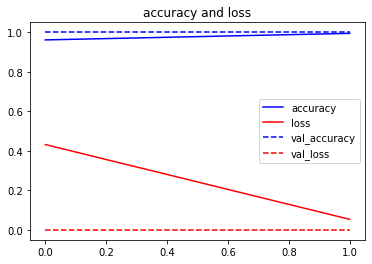

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
valacc = history.history['val_acc']
valloss = history.history['val_loss']

epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, valacc, 'b--', label='val_accuracy')
plt.plot(epochs, valloss, 'r--', label='val_loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

##  3.4. 학습된 모델을 이용해 Test 데이터에 대한 Prediction

In [ ]:
# For prediction purposes
y_pred = model_finetuning.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

5895/5895 [==============================] - 56s 10ms/step


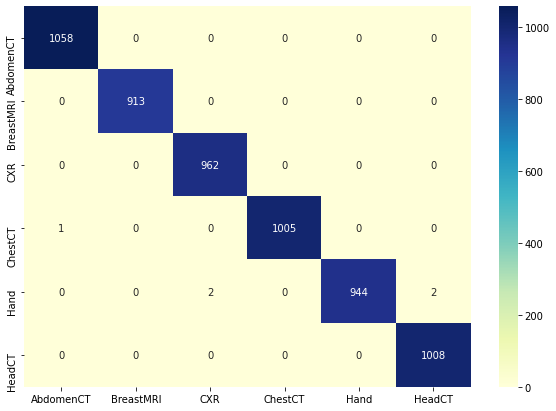

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_test, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00      1058
   BreastMRI       1.00      1.00      1.00       913
         CXR       1.00      1.00      1.00       962
     ChestCT       1.00      1.00      1.00      1006
        Hand       1.00      1.00      1.00       948
      HeadCT       1.00      1.00      1.00      1008

    accuracy                           1.00      5895
   macro avg       1.00      1.00      1.00      5895
weighted avg       1.00      1.00      1.00      5895



# [4] VGG16를 이용한 분류 실습 (w/ data augmentation)

**Data augmentation: 데이터에 다양한 형태의 변화를 임의로 생성하여 데이터의 갯수와 다양성을 증가시키는 방법**

![Data augmentation](https://miro.medium.com/max/1250/1*rvwzKkvhlDN3Wo_4Oay_4Q.png)
https://medium.com/@thimblot/data-augmentation-boost-your-image-dataset-with-few-lines-of-python-155c2dc1baec

## 4.1. Image Data Generator 정의 (w/ data augmentation)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = './train'
validation_dir = './valid'
test_dir = './test'
image_size = 224
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = vgg16.preprocess_input(X)
    return X[0]

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg,
    #rotation_range=20, # 회전 최대 20도
    width_shift_range=0.2, # 좌우 이동
    height_shift_range=0.2, # 상하 이동
    #horizontal_flip=True, # 좌우 반전
    #vertical_flip=True, # 상하 반전
    )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 테스트에 사용될 이미지 데이터 생성기
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

# 테스트에 사용될 데이터 생성기
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

Found 17730 images belonging to 6 classes.
Found 6007 images belonging to 6 classes.
Found 5895 images belonging to 6 classes.


## 4.2. VGG16 ImageNet w/o pre-trained weight

In [ ]:
K.clear_session() # 새로운 세션으로 시작

# 모델 불러오기
vgg_model = VGG16(weights=None, include_top=False, input_shape=(image_size, image_size, 3))

# VGG16모델에 Fully Connected부분을 재구성해서 추가
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
pred = Dense(numClass, activation='softmax')(x)

model = Model(vgg_model.input, pred)

# 모델 요약
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## 4.3. 학습!

In [ ]:
vgg16_model_path = 'vgg16_scratch_w_dataaug.h5'

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit(
      train_generator,
      steps_per_epoch=50 ,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=1)

# 모델 저장
model.save(vgg16_model_path)

Epoch 1/2
50/50 [==============================] - 28s 563ms/step - loss: 1.8229 - acc: 0.3375 - val_loss: 0.1476 - val_acc: 1.0000
Epoch 2/2
50/50 [==============================] - 28s 566ms/step - loss: 0.5391 - acc: 0.8169 - val_loss: 0.0023 - val_acc: 1.0000


## 4.4. 학습 결과 시각화

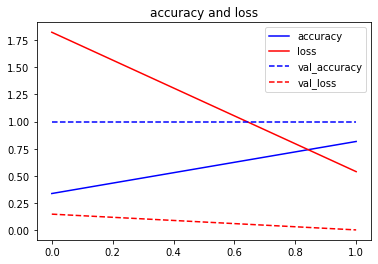

In [ ]:
acc = history.history['acc']
loss = history.history['loss']
valacc = history.history['val_acc']
valloss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, valacc, 'b--', label='val_accuracy')
plt.plot(epochs, valloss, 'r--', label='val_loss')
plt.title('accuracy and loss')
plt.legend()
  
plt.show()

## 4.5. 학습된 모델을 이용해 Test 데이터에 대한 Prediction


In [ ]:
# For prediction purposes
y_pred = model.predict_generator(test_generator, steps=test_generator.samples, verbose=1)
y_pred1 = np.argmax(y_pred, axis=1)

5895/5895 [==============================] - 55s 9ms/step


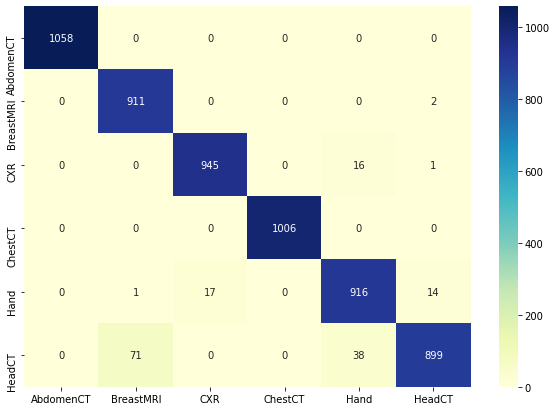

In [ ]:
# calculate confusion matrix for the predicted dataset
cm = confusion_matrix(y_test, y_pred1)

# make a dataframe using cm array
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames])

# plot confusion matrix
plt.figure(figsize = (10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
# classification report generation: precision, recall, f1-score. 
print(classification_report(y_test, y_pred1, target_names=classNames))

              precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00      1058
   BreastMRI       0.93      1.00      0.96       913
         CXR       0.98      0.98      0.98       962
     ChestCT       1.00      1.00      1.00      1006
        Hand       0.94      0.97      0.96       948
      HeadCT       0.98      0.89      0.93      1008

    accuracy                           0.97      5895
   macro avg       0.97      0.97      0.97      5895
weighted avg       0.97      0.97      0.97      5895



# [5] Model Interpretability with GradCAM

![gradCAM](https://camo.githubusercontent.com/450498bd998fd99d51b647d2b6c8631e94585522/687474703a2f2f692e696d6775722e636f6d2f4a614762645a352e706e67)

**Grad-CAM: Why did you say that? Visual Explanations from Deep Networks via Gradient-based Localization**
Ramprasaath R. Selvaraju, Abhishek Das, Ramakrishna Vedantam, Michael Cogswell, Devi Parikh, Dhruv Batra
https://arxiv.org/abs/1610.02391

**Example: 'Boxer'**

![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog.png) 
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_gradcam.jpg)
![alt text](https://github.com/PowerOfCreation/keras-grad-cam/raw/master/examples/cat_dog_242_guided_gradcam.jpg)

In [ ]:
import tensorflow as tf
import cv2

In [ ]:
def grad_cam(input_model, image):
    preds = input_model.predict(image)
    predicted_label = np.argmax(preds[0])
    heatmap_model = keras.Model([input_model.inputs], [input_model.get_layer('block5_conv3').output, input_model.output])        
    
    with tf.GradientTape() as tape:
        last_conv_outputs, predictions = heatmap_model(image) # VGG16의 마지막 convolution layer의 특성맵과 예측 벡터
        output = predictions[:, predicted_label]              # 예측 벡터에서 해당 클래스 항목
        
    grads = tape.gradient(output, last_conv_outputs)      # VGG16의 마지막 convolution layer의 특성맵 출력에 대한 해당 클래스의 그래디언트
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # 특성맵 채널별 그래디언트 평균값이 담긴 (512,) 크기의 벡터
    
    last_conv_outputs = last_conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i, w in enumerate(pooled_grads):                    # 해당 클래스에 대한 채널의 중요도를 특성 맵 배열의 채널에 곱함
        last_conv_outputs[:,:,i] *= w
        
    heatmap = np.mean(last_conv_outputs, axis=-1) # 만들어진 특성 맵에서 채널 축을 따라 평균 --> 해당 클래스의 히트맵
    
    # 히트맵 후처리
    heatmap = np.maximum(heatmap, 0)               
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (224, 224))

    # 입력 영상을 8-bit RGB 영상으로 변환
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    
    return np.uint8(cam), heatmap, predicted_label

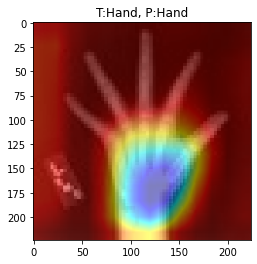

In [ ]:
# Select a random query image+
inum = np.random.randint(numTotal)
qimage0 = load_img(imageFilesList[inum], target_size=(224, 224))
qimage  = img_to_array(qimage0)
qimage  = qimage.reshape((1, 224, 224, 3))
qimage  = vgg16.preprocess_input(qimage)

# CAM 출력
cam, heatmap, plabel = grad_cam(model, qimage)
plt.title('T:'+classNames[imageClass[inum]]+', P:'+classNames[plabel])
plt.imshow(cam)
plt.show()